In [16]:
import numpy as np 
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas_profiling
%matplotlib inline

In [17]:
train_df = pd.read_csv("train.csv", index_col=0)
test_df = pd.read_csv("test.csv", index_col = 0)
y_test = pd.read_csv("test_labels.csv", index_col = 0)

In [18]:
train_df.dtypes

Weight      float64
Age         float64
Days          int64
Vegan         int64
Cats          int64
Cash        float64
Size         object
Toppings     object
dtype: object

In [19]:
train_df.head()

,Weight,Age,Days,Vegan,Cats,Cash,Size,Toppings
1,106.238809,36.596211,38,0,1,5.699125,No order,No order
2,184.378192,28.739952,28,0,0,1.171537,No order,No order
3,232.475732,106.605562,38,1,1,259.440103,Large,Hawaiian
4,112.811584,103.684648,112,0,0,13.886261,No order,No order
5,139.317810,15.045878,78,0,0,1934.054928,Medium,Pepperoni


In [20]:
len(train_df)

500

In [21]:
summary_df = train_df.describe()

In [22]:
trimmed_summary = pd.concat([summary_df[1:4], summary_df[7:8]], axis = 0)

In [23]:
trimmed_summary[["Weight", "Age", "Days", "Vegan", "Cats", "Cash"]]

,Weight,Age,Days,Vegan,Cats,Cash
mean,149.848538,60.290461,43.540000,0.04200,0.396000,3797.894630
std,45.907961,28.123431,32.881527,0.20079,0.695811,22126.256472
min,75.000000,13.008069,0.000000,0.00000,0.000000,0.273849
max,299.348740,109.993134,199.000000,1.00000,5.000000,425434.282276


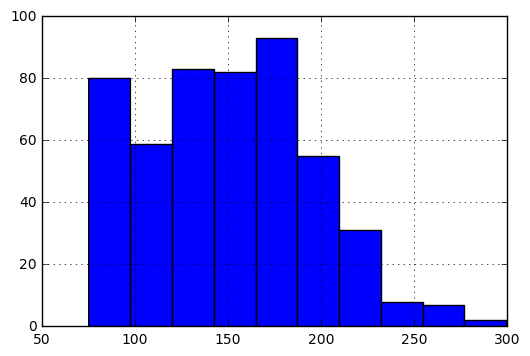

In [24]:
train_df.Weight.hist()

TypeError: cannot concatenate 'str' and 'float' objects

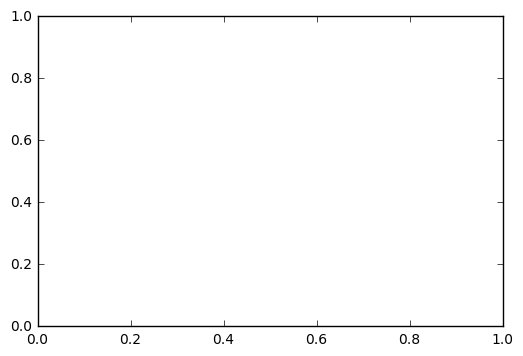

In [25]:
train_df.Size.hist()

In [ ]:
train_df.Toppings.hist()

In [27]:
train_df.groupby(["Size"]).count()

,Weight,Age,Days,Vegan,Cats,Cash,Toppings
Size,,,,,,,
2+ Pizza,51,51,51,51,51,51,51
Large,110,110,110,110,110,110,110
Medium,116,116,116,116,116,116,116
No order,87,87,87,87,87,87,87
Small,66,66,66,66,66,66,66
X-Large,70,70,70,70,70,70,70


In [28]:
train_df.Age.count()

500

In [29]:
train_df.groupby(["Toppings"]).count()

,Weight,Age,Days,Vegan,Cats,Cash,Size
Toppings,,,,,,,
BBQ-Chicken,44,44,44,44,44,44,44
Cheese,122,122,122,122,122,122,122
Hawaiian,85,85,85,85,85,85,85
Meat-lovers,44,44,44,44,44,44,44
No order,87,87,87,87,87,87,87
Pepperoni,30,30,30,30,30,30,30
Supreme,88,88,88,88,88,88,88


In [30]:
topping_names = ["BBQ-Chicken", "Cheese", "Hawaiian", "Meat-lovers", "No order", "Pepperoni", "Supreme"]

In [31]:
size_names = ["2+ Pizza", "Large", "Medium", "No order", "Small", "X-Large"]

In [32]:
train_df.groupby(["Toppings", "Vegan"]).count()

Weight  Age  Days  Cats  Cash  Size
Toppings    Vegan                                     
BBQ-Chicken 0          43   43    43    43    43    43
            1           1    1     1     1     1     1
Cheese      0         118  118   118   118   118   118
            1           4    4     4     4     4     4
Hawaiian    0          81   81    81    81    81    81
            1           4    4     4     4     4     4
Meat-lovers 0          44   44    44    44    44    44
No order    0          82   82    82    82    82    82
            1           5    5     5     5     5     5
Pepperoni   0          30   30    30    30    30    30
Supreme     0          81   81    81    81    81    81
            1           7    7     7     7     7     7

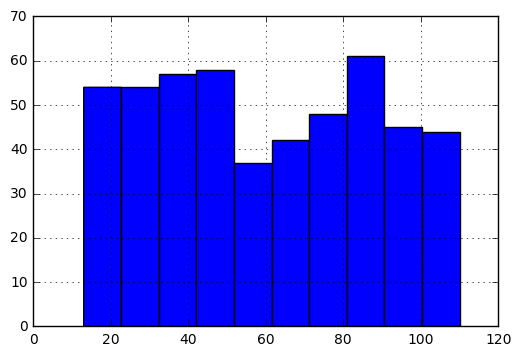

In [33]:
train_df.Age.hist()

In [34]:
cashh = train_df[train_df["Cash"] < 2000]

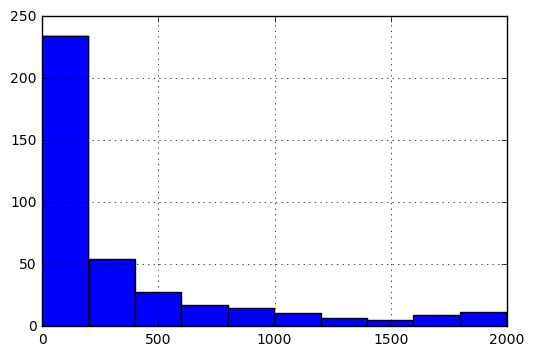

In [35]:
cashh.Cash.hist()

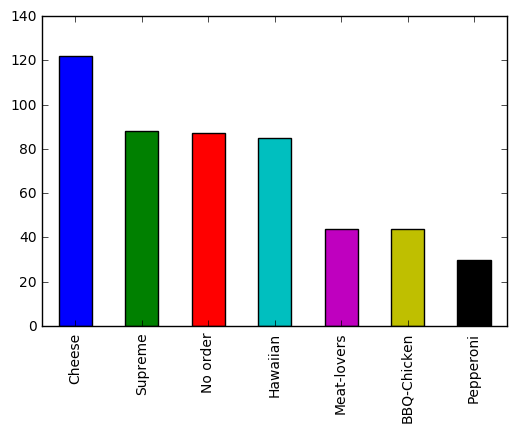

In [36]:
train_df['Toppings'].value_counts().plot(kind='bar')

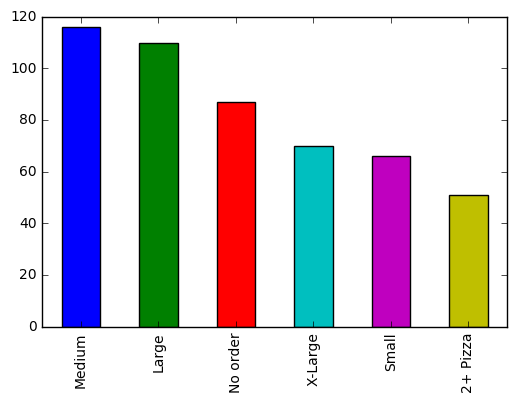

In [37]:
train_df['Size'].value_counts().plot(kind='bar')

# Feature engineering

In [38]:
train_df['Size'] = train_df['Size'].astype('category')
train_df['Toppings'] = train_df['Toppings'].astype('category')

In [39]:
cat_columns = train_df.select_dtypes(['category']).columns

In [40]:
train_df.Toppings

1         No order
2         No order
3         Hawaiian
4         No order
5        Pepperoni
6      Meat-lovers
7      Meat-lovers
8      BBQ-Chicken
9      Meat-lovers
10          Cheese
11          Cheese
12          Cheese
13     Meat-lovers
14        No order
15     BBQ-Chicken
16       Pepperoni
17     BBQ-Chicken
18          Cheese
19        Hawaiian
20     Meat-lovers
21         Supreme
22        Hawaiian
23        Hawaiian
24         Supreme
25          Cheese
26          Cheese
27        Hawaiian
28        No order
29     BBQ-Chicken
30         Supreme
          ...     
471    Meat-lovers
472         Cheese
473      Pepperoni
474       Hawaiian
475        Supreme
476        Supreme
477      Pepperoni
478         Cheese
479       No order
480       No order
481        Supreme
482       Hawaiian
483       No order
484       No order
485       Hawaiian
486        Supreme
487      Pepperoni
488         Cheese
489       Hawaiian
490        Supreme
491         Cheese
492       No

In [41]:
train_df[cat_columns] = train_df[cat_columns].apply(lambda x: x.cat.codes)


In [42]:
col_list = ["Days", "Cats"]

In [43]:
def mean_encoding(df, test, col):
    mean_topping = df.Toppings.mean()
    for item in col:
        mean_device_type = df.groupby(item).Toppings.mean()
        test[item+"_mean_enc"] = test[item].map(mean_device_type)
        df[item+"_mean_enc"] = df[item].map(mean_device_type)
        test[item+"_mean_enc"].fillna(mean_topping, inplace=True)
        df[item+"_mean_enc"].fillna(mean_topping, inplace=True)

    return df, test

In [44]:
train_en, test_en = mean_encoding(train_df, test_df, col_list)

In [45]:
df_na = train_en.isnull().any()
[fea for fea in df_na.index if df_na[fea]]

[]

In [46]:
df_na = test_en.isnull().any()
[fea for fea in df_na.index if df_na[fea]]

[]

In [47]:

cat_columns = train_df.select_dtypes(['category']).columns
test_df[cat_columns] = train_df[cat_columns].apply(lambda x: x.cat.codes)


# split valid and train

In [48]:
rindex = np.random.choice(len(train_en), replace = False, size = int(len(train_en)*.2))
all_index = np.random.choice(len(train_en), replace = False, size = int(len(train_en)))
dfindex = np.setdiff1d(all_index, rindex)
valid_df = train_en.iloc[rindex]
train_df = train_en.iloc[dfindex]

In [49]:
train_df.head()

,Weight,Age,Days,Vegan,Cats,Cash,Size,Toppings,Days_mean_enc,Cats_mean_enc
1,106.238809,36.596211,38,0,1,5.699125,3,4,3.068182,3.024793
2,184.378192,28.739952,28,0,0,1.171537,3,4,3.068493,2.867052
3,232.475732,106.605562,38,1,1,259.440103,1,2,3.068182,3.024793
4,112.811584,103.684648,112,0,0,13.886261,3,4,3.000000,2.867052
6,166.420273,103.482744,7,0,0,9947.243863,1,3,2.333333,2.867052


# predicting the toppings

In [70]:
from sklearn.metrics import log_loss, accuracy_score, precision_recall_fscore_support

In [71]:
y_train = train_df["Toppings"]
y_valid = valid_df["Toppings"]


In [72]:
train_df_model = train_df.drop(["Size", "Toppings"], axis = 1)
valid_df_model = valid_df.drop(["Size", "Toppings"], axis = 1)

In [73]:
n_estimators=[250, 500, 750, 1000]
min_samples_leaf =  [1, 2, 5, 7]
max_depth = [3, 5, 10]
lowest_ll = 9e9
best_tree = 0
best_leaf = 0
best_depth = 0

for tree in n_estimators:
    for leaf in min_samples_leaf:
        for depth in max_depth:
            rfc = RandomForestClassifier(n_estimators = tree, min_samples_leaf=leaf, max_depth = depth)
            rfc.fit(train_df_model, y_train)
            rf_preds = rfc.predict_proba(valid_df_model)
            if log_loss(y_valid, rf_preds) < lowest_ll:
                lowest_ll = log_loss(y_valid, rf_preds)
                best_tree = tree
                best_leaf = leaf
                best_depth = depth
                print("n_estimators: %d  min_samples_leaf: %d  max_depth: %d  %f" % 
                      (tree, leaf, depth, log_loss(y_valid, rf_preds)))




n_estimators: 250  min_samples_leaf: 1  max_depth: 3  1.572543
n_estimators: 250  min_samples_leaf: 1  max_depth: 5  1.492040
n_estimators: 250  min_samples_leaf: 1  max_depth: 10  1.417069
n_estimators: 500  min_samples_leaf: 1  max_depth: 10  1.405016


In [74]:
rfc_best = RandomForestClassifier(n_estimators= best_tree, min_samples_leaf = best_leaf, max_depth = best_depth)
rfc_best.fit(train_df_model, y_train)
rf_preds = rfc_best.predict_proba(test_en)

In [75]:
y_test_top = y_test["Toppings"].to_frame()
y_test_top['Toppings'] = y_test_top['Toppings'].astype('category')
cat_columns = y_test_top.select_dtypes(['category']).columns
y_test_top[cat_columns] = y_test_top[cat_columns].apply(lambda x: x.cat.codes)


In [76]:
log_loss(y_test_top, rf_preds)

1.5192945273833611

In [77]:
rf_preds_ = rfc_best.predict(test_en)

In [78]:
accuracy_score(y_test_top, rf_preds_)

0.41999999999999998

In [79]:
features = train_df_model.columns

In [80]:
importances = rfc_best.feature_importances_

In [81]:
indices = np.argsort(importances)

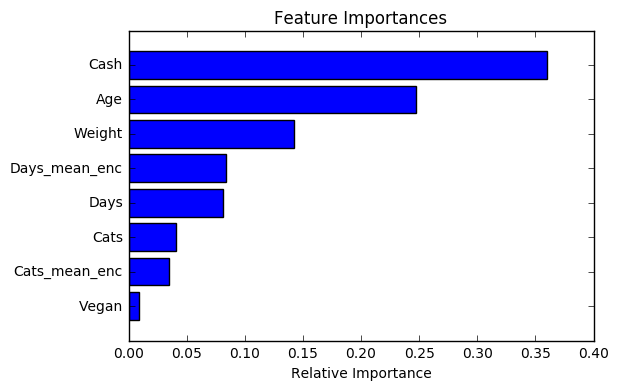

In [82]:
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

In [83]:
precision, recall, fbeta, support = precision_recall_fscore_support(y_test_top, rf_preds_ )

In [84]:
topping_names

['BBQ-Chicken',
 'Cheese',
 'Hawaiian',
 'Meat-lovers',
 'No order',
 'Pepperoni',
 'Supreme']

In [85]:
indices_top = np.argsort(precision)

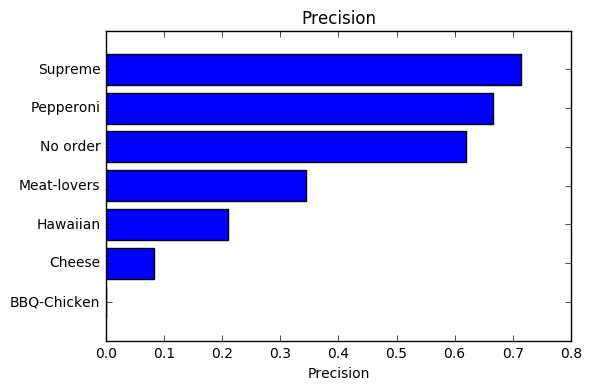

In [86]:
plt.title('Precision')
plt.barh(range(len(indices_top)), precision[indices_top], color='b', align='center')
plt.yticks(range(len(indices_top)), topping_names)
plt.xlabel('Precision')
plt.show()

In [87]:
indices_top = np.argsort(recall)

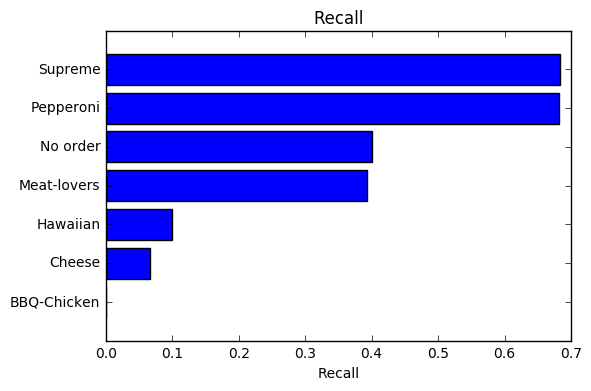

In [88]:
plt.title('Recall')
plt.barh(range(len(indices_top)), recall[indices_top], color='b', align='center')
plt.yticks(range(len(indices_top)), topping_names)
plt.xlabel('Recall')
plt.show()

# Predicting Size!

In [89]:
y_train = train_df["Size"]
y_valid = valid_df["Size"]

In [90]:
n_estimators=[250, 500, 750, 1000]
min_samples_leaf =  [1, 2, 5, 7]
max_depth = [3, 5, 10]
lowest_ll = 9e9
best_tree = 0
best_leaf = 0
best_depth = 0

for tree in n_estimators:
    for leaf in min_samples_leaf:
        for depth in max_depth:
            rfc = RandomForestClassifier(n_estimators = tree, min_samples_leaf=leaf, max_depth = depth)
            rfc.fit(train_df_model, y_train)
            rf_preds = rfc.predict_proba(valid_df_model)
            if log_loss(y_valid, rf_preds) < lowest_ll:
                lowest_ll = log_loss(y_valid, rf_preds)
                best_tree = tree
                best_leaf = leaf
                best_depth = depth
                print("n_estimators: %d  min_samples_leaf: %d  max_depth: %d  %f" % 
                      (tree, leaf, depth, log_loss(y_valid, rf_preds)))

n_estimators: 250  min_samples_leaf: 1  max_depth: 3  1.508152
n_estimators: 250  min_samples_leaf: 1  max_depth: 5  1.441104
n_estimators: 250  min_samples_leaf: 1  max_depth: 10  1.372299


In [91]:
rfc_best = RandomForestClassifier(n_estimators= best_tree, min_samples_leaf = best_leaf, max_depth = best_depth)
rfc_best.fit(train_df_model, y_train)
rf_preds = rfc_best.predict_proba(test_en)

In [92]:
y_test_size = y_test["Size"].to_frame()
y_test_size['Size'] = y_test_size['Size'].astype('category')
cat_columns = y_test_size.select_dtypes(['category']).columns
y_test_size[cat_columns] = y_test_size[cat_columns].apply(lambda x: x.cat.codes)

In [93]:
rf_preds_ = rfc_best.predict(test_en)

In [94]:
accuracy_score(y_test_size, rf_preds_)

0.35999999999999999

In [95]:
features = train_df_model.columns

In [96]:
features = train_df_model.columns
importances = rfc_best.feature_importances_
indices = np.argsort(importances)

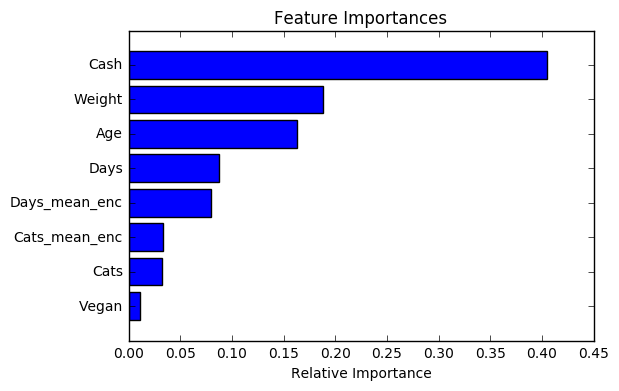

In [97]:
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

In [98]:
precision, recall, fbeta, support = precision_recall_fscore_support(y_test_top, rf_preds_ )

/Users/saramahar/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [99]:
indices_top = np.argsort(precision)

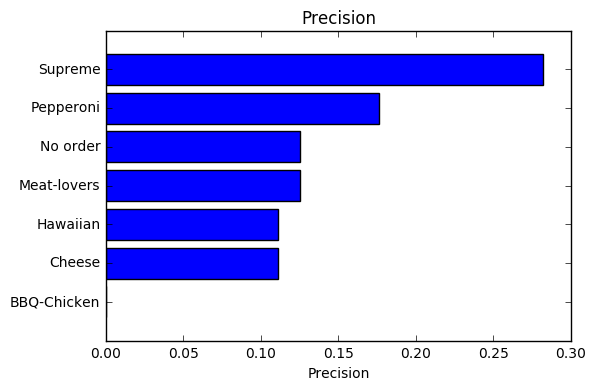

In [100]:
plt.title('Precision')
plt.barh(range(len(indices_top)), precision[indices_top], color='b', align='center')
plt.yticks(range(len(indices_top)), topping_names)
plt.xlabel('Precision')
plt.show()

In [101]:
indices_top = np.argsort(recall)

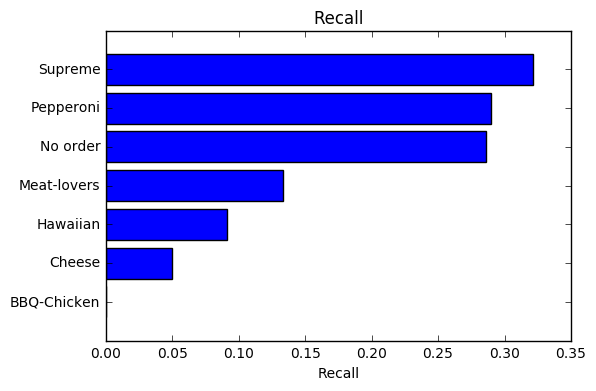

In [102]:
plt.title('Recall')
plt.barh(range(len(indices_top)), recall[indices_top], color='b', align='center')
plt.yticks(range(len(indices_top)), topping_names)
plt.xlabel('Recall')
plt.show()

# XGBoost

In [55]:
import xgboost as xgb

In [56]:
n_estimators=[100, 200, 300, 500, 600, 1000]
min_child_weight =  [5, 10, 15]
max_depth = [5, 10, 15]
learning_rate = [0.1, .001, .0001]
lowest_ll = 9e9
best_tree = 0
best_child = 0
best_depth = 0
best_rate = 0

for tree in n_estimators:
    for weight in min_child_weight:
        for depth in max_depth:
            for rate in learning_rate:
                xgb_model = xgb.XGBClassifier(n_estimators = tree, min_child_weight=weight, 
                                              max_depth = depth, learning_rate = rate, n_jobs = -1)
                xgb_model.fit(train_df_model, y_train)
                xg_preds = xgb_model.predict_proba(valid_df_model)
                if log_loss(y_valid, xg_preds) < lowest_ll:
                    lowest_ll = log_loss(y_valid, xg_preds)
                    best_tree = tree
                    best_child = weight
                    best_depth = depth
                    best_rate = rate
                    print("n_estimators: %d  min_child_weight: %d  max_depth: %d  learning rate:  %f  %f" % 
                          (tree, weight, depth, rate, log_loss(y_valid, xg_preds)))



n_estimators: 100  min_child_weight: 5  max_depth: 5  learning rate:  0.100000  1.572459
n_estimators: 100  min_child_weight: 10  max_depth: 5  learning rate:  0.100000  1.478072
n_estimators: 100  min_child_weight: 15  max_depth: 5  learning rate:  0.100000  1.436177


In [58]:
xgb_model = xgb.XGBClassifier(n_estimators = best_tree, min_child_weight=best_child, 
                                              max_depth = best_depth, learning_rate = best_rate, n_jobs = -1)
xgb_model.fit(train_df_model, y_train)
xg_preds = xgb_model.predict_proba(test_en)

In [64]:
xg_preds_ = xgb_model.predict(test_en)
accuracy_score(y_test_top, xg_preds_)

0.44

# predicting size with xgboost

In [65]:
y_train = train_df["Size"]
y_valid = valid_df["Size"]

In [66]:
n_estimators=[100, 200, 300, 500, 600, 1000]
min_child_weight =  [5, 10, 15]
max_depth = [5, 10, 15]
learning_rate = [0.1, .001, .0001]
lowest_ll = 9e9
best_tree = 0
best_child = 0
best_depth = 0
best_rate = 0

for tree in n_estimators:
    for weight in min_child_weight:
        for depth in max_depth:
            for rate in learning_rate:
                xgb_model = xgb.XGBClassifier(n_estimators = tree, min_child_weight=weight, 
                                              max_depth = depth, learning_rate = rate, n_jobs = -1)
                xgb_model.fit(train_df_model, y_train)
                xg_preds = xgb_model.predict_proba(valid_df_model)
                if log_loss(y_valid, xg_preds) < lowest_ll:
                    lowest_ll = log_loss(y_valid, xg_preds)
                    best_tree = tree
                    best_child = weight
                    best_depth = depth
                    best_rate = rate
                    print("n_estimators: %d  min_child_weight: %d  max_depth: %d  learning rate:  %f  %f" % 
                          (tree, weight, depth, rate, log_loss(y_valid, xg_preds)))

n_estimators: 100  min_child_weight: 5  max_depth: 5  learning rate:  0.100000  1.487640
n_estimators: 100  min_child_weight: 10  max_depth: 5  learning rate:  0.100000  1.377445
n_estimators: 100  min_child_weight: 10  max_depth: 10  learning rate:  0.100000  1.363081
n_estimators: 100  min_child_weight: 15  max_depth: 5  learning rate:  0.100000  1.298208
n_estimators: 100  min_child_weight: 15  max_depth: 10  learning rate:  0.100000  1.295971


In [67]:
xgb_model = xgb.XGBClassifier(n_estimators = best_tree, min_child_weight=best_child, 
                                              max_depth = best_depth, learning_rate = best_rate, n_jobs = -1)
xgb_model.fit(train_df_model, y_train)
xg_preds = xgb_model.predict_proba(test_en)

In [69]:
xg_preds_ = xgb_model.predict(test_en)
accuracy_score(y_test_size, xg_preds_)

0.41333333333333333